# Exercise: Energy System Model 1

Fabian Schmid | Institut für Energietechnik | FG EVUR | Berlin


## Agenda:
- Scenario development
- Input data
- Create oemof model
- Optimize oemof model
- Access results

## Scenario development
#### Process of energy system modeling


<img src="jupyter_pics/process_of_energy_system_modeling.png" width="500">



### Real problem with research question
- Identify the cost-optimal system configuration of a fictive 100% renewable based electricity energy system
- Electricity demand is given as timeseries data
- Technical components:
    - PV
    - Wind turbines
    - Electricity Storage
- Excess electricity can be feed-in to an electricity grid without any feed-in tariffs
- Electricity import is not possible, the energy demand shall be covered by internal renewable ressources

#### Energy system to be analyzed

<img src="jupyter_pics/Icons_EnergySystem_exercise1.PNG" width="400">

#### Energy system model: inputs and outputs

<img src="jupyter_pics/overview_model_setup.PNG" width="600">

## Input data 

Overview on Input data, defined in external Excel file
- Meteorological data
    - Timeseries of capacity factors of PV and Wind
    - Timeseries of normalized electricity demand
    
<img src="jupyter_pics/ex1_input_timeseries.PNG" width="450">


- System configuration technical data
    - Storage technical parameter
    
<img src="jupyter_pics/ex1_input_tech.PNG" width="300">

  - Project description: General and economic data

<img src="jupyter_pics/ex1_input_costs.PNG" width="400">


### Read and plot input data 

- Input data is saved in 'input_data_exercise1.xls' in folder data, it contains
    - Hourly timeseries for 1 year of normalized electricty demand and capacity factors for PV and Wind turbine feed in in sheet 'timeseries'
    - Annual electricty demand in MWh in sheet 'capacities'
    - Cost data for all considered technologies in sheet 'costs'
    - Technical parameters in sheet 'tech'
- Use pandas.read_excel() function to read excel file
    - Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

- Loaded data is timeseries data as **pandas.DataFrame**
    - Time series data consists of data points attached to sequential time stamps. 
    - https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html
 
 
**TASK**:

- Read each excel sheet in a separat DataFrame, called timeseries, capacities, tech and costs
- Plot timeseries data and print annual electricity demand

In [36]:
# Load libaries
import pandas as pd

#%% Read input data
# Timeseries Data Reading
timeseries = pd.read_excel('../data/input_data_exercise1.xls', 
                           sheet_name='timeseries', 
                           index_col=[0], 
                           parse_dates=True)
# Add timeindex frequency
timeseries.index.freq = '1H'

# Capacity Data Reading
capacities = pd.read_excel('../data/input_data_exercise1.xls', 
                           sheet_name='capacity', 
                           index_col=[0])

# Cost Data Reading
costs = pd.read_excel('../data/input_data_exercise1.xls', 
                           sheet_name='costs', 
                           index_col=[0])

# Tech Data Reading
tech = pd.read_excel('../data/input_data_exercise1.xls', 
                           sheet_name='tech', 
                           index_col=[0])


In [37]:
timeseries.index

DatetimeIndex(['2050-01-01 00:00:00+00:00', '2050-01-01 01:00:00+00:00',
               '2050-01-01 02:00:00+00:00', '2050-01-01 03:00:00+00:00',
               '2050-01-01 04:00:00+00:00', '2050-01-01 05:00:00+00:00',
               '2050-01-01 06:00:00+00:00', '2050-01-01 07:00:00+00:00',
               '2050-01-01 08:00:00+00:00', '2050-01-01 09:00:00+00:00',
               ...
               '2050-12-31 14:00:00+00:00', '2050-12-31 15:00:00+00:00',
               '2050-12-31 16:00:00+00:00', '2050-12-31 17:00:00+00:00',
               '2050-12-31 18:00:00+00:00', '2050-12-31 19:00:00+00:00',
               '2050-12-31 20:00:00+00:00', '2050-12-31 21:00:00+00:00',
               '2050-12-31 22:00:00+00:00', '2050-12-31 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='timeindex', length=8760, freq='h')

array([<Axes: xlabel='timeindex'>, <Axes: xlabel='timeindex'>,
       <Axes: xlabel='timeindex'>], dtype=object)

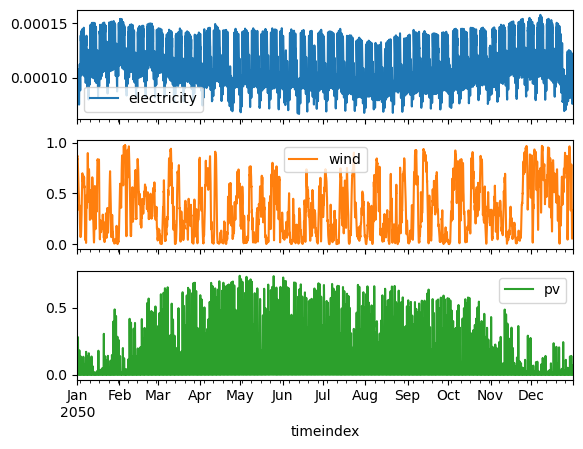

In [38]:
# Plot timeseries data
timeseries.plot(subplots=True)


In [39]:
# Print value of annual electrocty demand
print('Annual electricty demand =', capacities['electricity']['amount'], 'MWh')

Annual electricty demand = 18596726.5151087 MWh


## Create oemof model

**Components:**
- Photovoltaic
- Wind turbine

**Demand**
- Electricity demand

**Excess**
- Electricity excess to main grid

**TASK:**
- Work in groups and create a oemof graphical energy system model which specifies the most basic oemof classes
    - Components (Sink, Source, Transformer) and Bus

The correct oemof energysystem looks like this:
![oemof_EnergySystem_excerise1.png](jupyter_pics/oemof_EnergySystem_excerise1.png)


### Initialize energysystem
- Initialize your energy system called energysystem with a DatetimeIndex
    - You can use the index of our loaded timeseries data, as this is already formatted as Datetimeindex
    
    
- Necessary external libaries need to be loaded
    - oemof.solph
    
        - Documentation of oemof.solph: https://oemof-solph.readthedocs.io/en/latest/
        - Documentation how to use oemof.solph: https://oemof-solph.readthedocs.io/en/latest/usage.html#how-can-i-use-solph
        - Documentation of how to set up an energysystem model: https://oemof-solph.readthedocs.io/en/latest/usage.html#set-up-an-energy-system


In [40]:
# Load libaries
from oemof import solph
import warnings
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

In [41]:
# We can use the index of our loaded timeseries data, as this is already formatted as Datetimeindex
print(timeseries.index)

#%% Initialize the energy system
energysystem = solph.EnergySystem(timeindex=timeseries.index)

DatetimeIndex(['2050-01-01 00:00:00+00:00', '2050-01-01 01:00:00+00:00',
               '2050-01-01 02:00:00+00:00', '2050-01-01 03:00:00+00:00',
               '2050-01-01 04:00:00+00:00', '2050-01-01 05:00:00+00:00',
               '2050-01-01 06:00:00+00:00', '2050-01-01 07:00:00+00:00',
               '2050-01-01 08:00:00+00:00', '2050-01-01 09:00:00+00:00',
               ...
               '2050-12-31 14:00:00+00:00', '2050-12-31 15:00:00+00:00',
               '2050-12-31 16:00:00+00:00', '2050-12-31 17:00:00+00:00',
               '2050-12-31 18:00:00+00:00', '2050-12-31 19:00:00+00:00',
               '2050-12-31 20:00:00+00:00', '2050-12-31 21:00:00+00:00',
               '2050-12-31 22:00:00+00:00', '2050-12-31 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='timeindex', length=8760, freq='h')


### Create oemof bus

- All flows into and out of a Bus are balanced
- Therefore an instance of the Bus class represents a grid or network without losses
- To define an instance of a Bus only a unique label is necessary

**TASK:**
- Define Bus objects for electricity with the unique label *electricty_l*
- Add defined Bus object to energysystem

In [42]:
#%% Create oemof Bus

# create electricity bus
bus_electricity = solph.buses.Bus(label='electricity_l')

# add buses to energy model
energysystem.add(bus_electricity)

### Create oemof sinks
- Electricity demand
- Electricity excess

#### Definition of Flows
- The flow class has to be **used to connect**. 
- An instance of the Flow class is normally used in **combination with the definition of a component**.
- We will use the defined bus objects and flow objects for input and output definitions of further Source, Sink and GenericStorage objects.

- Documentation: https://oemof-solph.readthedocs.io/en/latest/reference/oemof.solph.flow.html


####  Definition of Sink objects
- A Sink is connected with **1 input flow**.
    - https://oemof-solph.readthedocs.io/en/latest/usage.html#sink-basic
- Use your defined Bus object for input and connect it via a Flow object with the electricity demand.
    Use the load demand timeseries data we loaded from the Excel file.

*Electricity demand:* Input is defined by electricity Bus which is connected via the Flow class with the excel electricity demand data. 
- Define the Flow class.
    - Define fix with the loaded timeseries of normalized electricity demand
    - Define nominal_value with the total annual electricty demand defined in capacities
    - Use the loaded timeseries data with the electricty demand.
    
*Electricity excess:* As electricty demand but with a empty Flow() 
        
        
**TASK:**
- Define the electricty demand and electricty excess Sink objects with the defined electricity Bus and Flow and the imported csv data.

In [43]:
#%% Create oemof Sinks

# create simple sink object representing the electrical demand
electricity_demand = solph.components.Sink(label='electricity_demand_l',
                                inputs={bus_electricity: solph.Flow(fix=timeseries['electricity'], 
                                                                    nominal_value=capacities['electricity']['amount'])
                                       }
                               )

# create excess component for the electricity bus to allow overproduction
electricity_excess = solph.components.Sink(label='electricty_excess_l', 
                                inputs={bus_electricity: solph.Flow()}
                               )

# All sinks to the energysystem
energysystem.add(electricity_excess, electricity_demand)

### Create oemof sources
- Wind turbine
- PV

#### Definition of source objects with investent mode (sizing optimization)
- A Source has **1 output flow**.
    - https://oemof-solph.readthedocs.io/en/latest/usage.html#source-basic
    - Use the capacity factor timeseries for PV and Wind we already loaded from the Excel file
    
    

- As the installation of new capacities of the sources Wind turbine and PV are associated with costs the **Investment mode** needs to be integrated!
    - https://oemof-solph.readthedocs.io/en/latest/usage.html#investment-optimisation
- We consider for this exercise only capacity costs (with capex but without fixed opex) and no marginal costs (variable opex) for additional installed capacities
    - Wind: Capacity costs = 1,075,000.0 €/MW, lifetime = 20 years, WACC = 0.05
    - PV: Capacity costs = 425,000.0 €/MW, lifetime = 20 years, WACC = 0.05
    
- Calculate the capital costs, which are the annuity of capital costs (capex) for all the components Wind and PV.


In [44]:
# Import economic libary
from oemof.tools import economics

#%% Economic calculation (for sizing optimization)

# Define capacity costs with oemof.tools.economics.annuity function
# Equivalent periodical costs (epc) of an investment are equal to the annuity in case of 1year simulation
cc_wind = economics.annuity(capex=costs['wind']['capex'], 
                            n=costs['wind']['lifetime'],
                            wacc=costs['wind']['wacc'])

cc_pv = economics.annuity(capex=costs['pv']['capex'], 
                            n=costs['pv']['lifetime'],
                            wacc=costs['pv']['wacc'])


 - Define the sources PV and Wind with the integrated investment
 
**TASK:**
-  Define the PV source object

In [45]:
#%%Create oemof Sources

# create fixed source object representing wind power plants
wind = solph.components.Source(label='wind_l',
                    outputs={bus_electricity: solph.Flow(fix=timeseries['wind'], 
                                                         investment=solph.Investment(ep_costs=cc_wind)
                                                        )
                            }
                   )

# create fixed source object representing pv power plants
pv = solph.components.Source(label='pv_l',
                  outputs={bus_electricity: solph.Flow(fix=timeseries['pv'], 
                                                       investment=solph.Investment(ep_costs=cc_pv)
                                                      )
                           }
                 )

# Add sources to the energysystem
energysystem.add(wind, pv)
               

### Create oemof GenericStorage
- Storage 


#### Definition of GenericStorage objects with investent mode (sizing optimization)
- The GenericStorage is designed for **1 input and 1 output**.
    - https://oemof-solph.readthedocs.io/en/latest/usage.html#genericstorage-component
   
   

- As the GenericStorage Storage component is associated with costs the **Investment mode** needs to be integrated!
- We consider for this exercise only capacity costs (with capex but without fixed opex) and no marginal costs (variable opex)
    - Storage: Capacity costs = 200,000.0 €/MWh, lifetime = 20 years, WACC = 0.05
- Calculate the capital costs, which are the annuity of capital costs (capex) for the storage component

In [46]:
#%% Economic calculation (for sizing optimization)

# Define capacity costs with oemof.tools.economics.annuity function
# Equivalent periodical costs (epc) of an investment are equal to the annuity in case of 1year simulation

cc_storage = economics.annuity(capex=costs['storage']['capex'], 
                               n=costs['storage']['lifetime'],
                               wacc=costs['storage']['wacc'])

#### Further parameter need to be consider when using the Investment mode with a GenericStorage
- It needs to be considered, that it is possible to
    - invest into the flow parameter of the storage e.g. turbine/pump or battery management system
    - Invest into the capacity of the storage e.g. basin or battery cell
  
    
- In order to keep our model simple, we set the following parameters:
    - *invest_relation_input_capacity = 1* fixes the input flow investment to the capacity investment. The value of 1 means that the storage can be filled within one time-period.
    - *invest_relation_output_capacity = 1* fixes the output flow investment to the capacity investment. The value of 1 means that the storage can be emptied within one period.


- We assume following technical storage parameters:
    - Initial storage content empty --> initial_storage_level=0
    - No self-discharge --> loss_rate=0 
    - Charging efficiency 1 --> inflow_conversion_factor=1
    - discharging efficiency 0.8 --> outflow_conversion_factor=0.8  
    
**TASK:**
- Define the technical parameters within the oemof storage object.

In [47]:
#%% Create oemof Storage

# create storage object representing a battery
storage = solph.components.GenericStorage(label='storage_l',
                                          inputs={bus_electricity: solph.Flow()},
                                          outputs={bus_electricity: solph.Flow()},
                                          loss_rate=tech['storage']['loss'],
                                          initial_storage_level=0,
                                          invest_relation_input_capacity=1/tech['storage']['max_hours'],
                                          invest_relation_output_capacity=1/tech['storage']['max_hours'],
                                          inflow_conversion_factor=1,
                                          outflow_conversion_factor=tech['storage']['efficiency'],
                                          investment=solph.Investment(ep_costs=cc_storage)
                                         )

# Add storage to the energysystem
energysystem.add(storage)
                 

## Optimize oemof model

- Define optimization model via solph.Model()
- Solve the optimization problem with the definition of the used solver and call attribute model.solve()
    - use cbc solver


In [48]:
#%% Optimise the energy system
# initialise the operational model
om = solph.Model(energysystem)

# if tee_switch is true solver messages will be displayed
om.solve(solver='cbc')

{'Problem': [{'Name': 'unknown', 'Lower bound': 3553206550.0, 'Upper bound': 3553206550.0, 'Number of objectives': 1, 'Number of constraints': 61329, 'Number of variables': 52571, 'Number of nonzeros': 3, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'User time': -1.0, 'System time': 5.34, 'Wallclock time': 5.34, 'Termination condition': 'optimal', 'Termination message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': None, 'Number of created subproblems': None}, 'Black box': {'Number of iterations': 7247}}, 'Error rc': 0, 'Time': 5.4385786056518555}], 'Solution': [OrderedDict({'number of solutions': 0, 'number of solutions displayed': 0})]}

In [31]:
# Store optimization results
#energysystem.results['main'] = solph.processing.results(om)

energysystem.dump('../results/dumps',
                  filename='model.oemof')

'Attributes dumped to: ../results/dumps\\model.oemof'

 ## Access results
 - Results could be restored from oemof file if model was not run just before.
 - For easy handling of results use 
     - solph.processing.results()
     - solph.views.node()  

#### solph.processing.results() function:
- Use solph.processing.results() function
    - Documentation: https://oemof-solph.readthedocs.io/en/latest/usage.html#results-collect-results-label
- Gives back the results as a python dictionary holding **pandas Series for scalar values** and **pandas DataFrames for all nodes and flows** between them.
- You can directly extract the data in the dictionary by using these keys, where “node” is the name of the object you want to address. 
    - you can use specified *component_label* to access the component data - '*component_label*' (use quotes)
    - you can use specified *component_parameter_name* to access the component data - *component_parameter_name*
- The keys of the results dictionary are tuples containing two nodes. Since flows have a starting node and an ending node

#### solph.views.node() function:
- An **easy access** of the results can be done via oemof.views.node()
    - https://oemof-solph.readthedocs.io/en/latest/usage.html#results-easy-access-label
- Easily one specific DataFrame can be extracted from us with the definition of the defined key.

dict_keys([("<oemof.solph.buses._bus.Bus: 'electricity_l'>", "<oemof.solph.components._sink.Sink: 'electricity_demand_l'>"), ("<oemof.solph.buses._bus.Bus: 'electricity_l'>", "<oemof.solph.components._sink.Sink: 'electricty_excess_l'>"), ("<oemof.solph.buses._bus.Bus: 'electricity_l'>", "<oemof.solph.components._generic_storage.GenericStorage: 'storage_l'>"), ("<oemof.solph.components._source.Source: 'pv_l'>", "<oemof.solph.buses._bus.Bus: 'electricity_l'>"), ("<oemof.solph.components._generic_storage.GenericStorage: 'storage_l'>", None), ("<oemof.solph.components._generic_storage.GenericStorage: 'storage_l'>", "<oemof.solph.buses._bus.Bus: 'electricity_l'>"), ("<oemof.solph.components._source.Source: 'wind_l'>", "<oemof.solph.buses._bus.Bus: 'electricity_l'>")])
{'scalars': ((pv_l, electricity_l), invest)    41269.568
((pv_l, electricity_l), total)     41269.568
Name: 2050-01-01 00:00:00+00:00, dtype: float64, 'sequences':                            ((pv_l, electricity_l), flow)
2050-

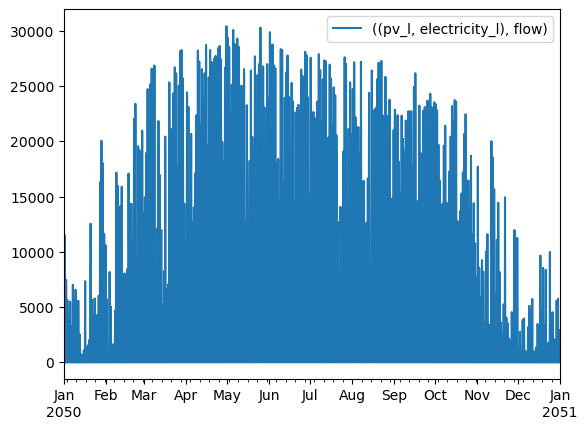

In [32]:
#%% Extract results 
# Extract results with processing module from model
results = solph.processing.results(om)
# Print all keys of result dictionary
print(results.keys())

# Extract component results dict with used component labels
results_pv = solph.views.node(results, 'pv_l')
results_wind = solph.views.node(results, 'wind_l')
results_storage = solph.views.node(results, 'storage_l')
print(results_pv)

# Extract timeseries data of flow
results_pv_ts = results_pv['sequences']
results_pv_ts.plot()

# Extract investment in component capacity
results_pv_cap = results_pv['scalars'][('pv_l', 'electricity_l'), 'invest']
print('results_pv_cap', results_pv_cap)
results_wind_cap = results_wind['scalars'][('wind_l', 'electricity_l'), 'invest']
print('results_wind_cap', results_wind_cap)
results_storage_cap = results_storage['scalars'][('storage_l', 'electricity_l'), 'invest']
print('results_storage_cap', results_storage_cap)

# Alternative access with component parameter names
# But stick to one mode via labels or component names, otherwise you run into problems!
#results_pv = solph.views.node(results, pv)


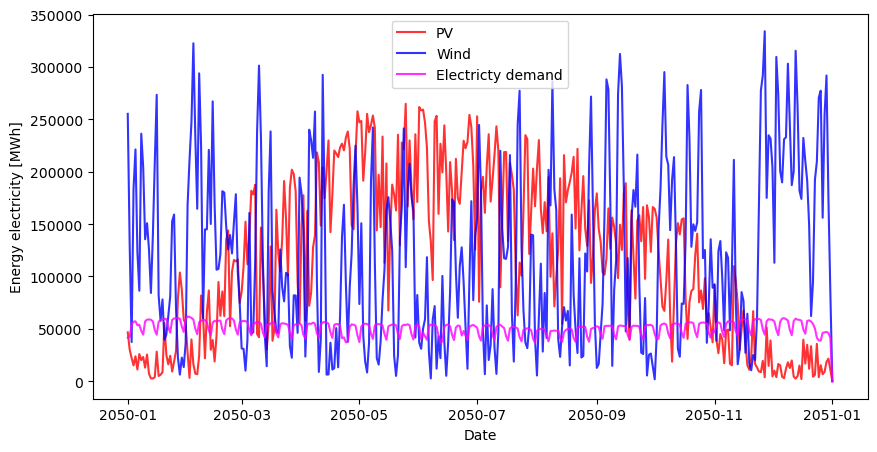

In [33]:
import matplotlib.pyplot as plt

#%% Lineplot
results_pv_ts = results_pv['sequences']
results_wind_ts = results_wind['sequences']
elec_demand_ts = solph.views.node(results, 'electricity_demand_l')['sequences']

# Resample timestep to wished step
# 'D'=Days, 'M' Months, 'Y' Years, also possile to specify multiple days e.g. '7D'
freq_sample = 'D'
# Resample timeseries data
elec_pv_rs1 = results_pv_ts.resample(freq_sample).sum()
elec_wind_rs1 = results_wind_ts.resample(freq_sample).sum()
elec_demand_rs1 = elec_demand_ts.resample(freq_sample).sum()


# Define figure with figsize
fig = plt.figure(figsize=(10,5))
# Define transparency level of plot 
set_alpha=0.8

# Plot resampled timeseries of components
plt.plot(elec_pv_rs1, alpha=set_alpha, color='red', label='PV')
plt.plot(elec_wind_rs1, alpha=set_alpha, color='blue', label='Wind')
plt.plot(elec_demand_rs1, alpha=set_alpha, color='magenta', label='Electricty demand')

# Add legend
plt.legend()
# Add labels
plt.ylabel('Energy electricity [MWh]')
plt.xlabel('Date')

plt.show()
# Save figure
fig.savefig('../results/analysis_electricity_lp.png', dpi=300)

## Conversion from Jupyter to Spyder

- Spyder IDL has the advantage of having a variable explorer and better grafical interface for system analysis
- Go to *file* - *Download as* and download is as *Python file* with the py extension.
- Open this file in the Spyder IDE.